## Download the dataset directly from analyicsVidhya

In [1]:

#Downloading the Training Datasets
#!wget --no-check-certificate \
#      "https://datahack.analyticsvidhya.com/contest/practice-problem-twitter-sentiment-analysis/download/train-file/train_E6oV3lV.csv"\
#      -O "/tmp/train_tweets.csv"

!wget --no-check-certificate \
      "https://datahack-prod.s3.amazonaws.com/train_file/train_E6oV3lV.csv"\
      -O "/tmp/train_tweets.csv"

--2020-06-04 05:12:30--  https://datahack-prod.s3.amazonaws.com/train_file/train_E6oV3lV.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.96
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103165 (3.0M) [text/csv]
Saving to: ‘/tmp/train_tweets.csv’

/tmp/train_tweets.c 100%[===================>]   2.96M  1.63MB/s    in 1.8s    

2020-06-04 05:12:33 (1.63 MB/s) - ‘/tmp/train_tweets.csv’ saved [3103165/3103165]



In [2]:
# Downloading the Testing Datasets
!wget --no-check-certificate \
      "https://datahack-prod.s3.amazonaws.com/test_file/test_tweets_anuFYb8.csv"\
      -O "/tmp/test_tweets.csv"

--2020-06-04 05:12:45--  https://datahack-prod.s3.amazonaws.com/test_file/test_tweets_anuFYb8.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.64
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1635543 (1.6M) [text/csv]
Saving to: ‘/tmp/test_tweets.csv’

/tmp/test_tweets.cs 100%[===================>]   1.56M  1.09MB/s    in 1.4s    

2020-06-04 05:12:48 (1.09 MB/s) - ‘/tmp/test_tweets.csv’ saved [1635543/1635543]



In [0]:
import numpy as np
import pandas as pd
df_train=pd.read_csv('/tmp/train_tweets.csv')
df_test=pd.read_csv('/tmp/test_tweets.csv')

In [4]:

df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


Labels Distribution:
 0    29720
1     2242
Name: label, dtype: int64


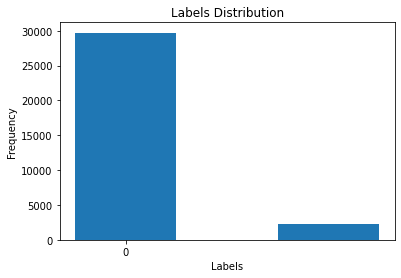

In [5]:
# Analysis the Label Distribution in training dataframe
import numpy as np
import matplotlib.pyplot as plt
plt.bar([0,1], df_train['label'].value_counts(), width=0.5, bottom=None, align='center', data=df_train)
plt.title('Labels Distribution')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1, step=2))
print('Labels Distribution:\n',df_train['label'].value_counts())

## Distribution Analysis says, its a imbalanced data

In [6]:
#Functions for Preprocessing the Dataset
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
from textblob import Word
nltk.download('wordnet')

def mystopwords(text):
    return ' '.join([w for w in word_tokenize(text) if not w in stop_words])

def lemmatize(text):
    return ' '.join([Word(word).lemmatize() for word in text.split()])

import re
def clean_text(string):
  #removing usernames from tweets
  clean=re.sub('@[a-zA-Z0-9_]+', '', string) 
  #remove newline character
  clean=re.sub('[\n]',' ',clean) 
  #remove non alphabetic characters
  clean=re.sub('[^a-zA-Z\']',' ',clean) 
  #remove stopwords (It was causing the issue in Model train , the dimensions werr getting impacted, hence removed)
  #clean=mystopwords(clean) 
  #clean=lemmatize(clean)
  #removing unnecessary spaces
  clean=' '.join(clean.split()) 
  return clean

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
#Cleaning the training dataset and separating the texts and labels
tweets=[]
labels=[]
for i in range(len(df_train)):
  labels.append(df_train['label'][i])
  tweets.append(clean_text(df_train['tweet'][i]))
  
#Cleaning the testing dataset 
test_tweets=[]
for i in range(len(df_test)):
  test_tweets.append(clean_text(df_test['tweet'][i]))

In [8]:
#Example of a tweet before and after cleaning
print('Tweet before cleaning: ',df_train['tweet'][1])
print('Tweet after cleaning: ',tweets[1])

Tweet before cleaning:  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
Tweet after cleaning:  thanks for lyft credit i can't use cause they don't offer wheelchair vans in pdx disapointed getthanked


Text(0.5, 1.0, 'Top 100 Words in the Hate Tweets')

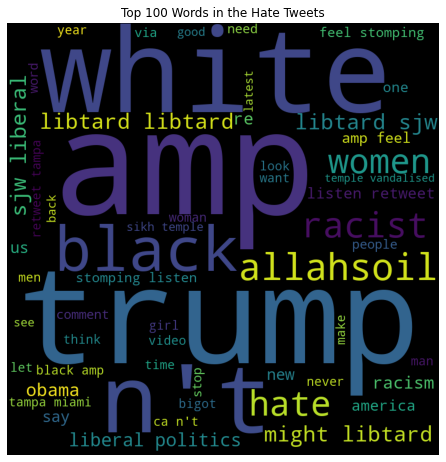

In [9]:
#Word Cloud of Top 100 Words in Hate Tweets 
from wordcloud import WordCloud, STOPWORDS  
hate=[]
#getting the hate tweets
for i in range(len(tweets)): 
  if labels[i]==1:
    hate.append(tweets[i])
#transforming the list of hate tweets into a single sentence
h=' '.join(hate)  
h=mystopwords(h)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 20,max_words=100).generate(h)
# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Top 100 Words in the Hate Tweets')

In [0]:

#Suffling the data and splitting the data into train and test sets (90:10)
from sklearn.model_selection import train_test_split
train_tweets, val_tweets, train_labels, val_labels= train_test_split(tweets, labels, test_size=0.1, shuffle= True,random_state=53)

In [11]:
#Data Summary
print('Length of the Training Set: ',len(df_train))
print('No. of Training Examples: ',len(train_tweets))
print('No. of Validation Examples: ',len(val_tweets))
print('No. of Test Examples: ',len(test_tweets))

Length of the Training Set:  31962
No. of Training Examples:  28765
No. of Validation Examples:  3197
No. of Test Examples:  17197


In [12]:
#Tokenization and Padding
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#embedding_dim = 200
max_length = 40
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
vocab_len = 49999

tokenizer = Tokenizer(num_words=vocab_len+1,oov_token=oov_tok)
tokenizer.fit_on_texts(tweets)

word_index = tokenizer.word_index
vocab_size=len(word_index)+1 
print('Size of Vocabulary: ',vocab_size)

train_sequences = tokenizer.texts_to_sequences(train_tweets)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

val_sequences = tokenizer.texts_to_sequences(val_tweets)
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_tweets)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

train_labels=np.expand_dims(train_labels, axis=1)
val_labels=np.expand_dims(val_labels, axis=1)

Size of Vocabulary:  38364


In [13]:

#Dimension of Data after Tokenizing and Padding
print('Dimension of Training Data: ',train_padded.shape)
print('Dimension of Validation Data: ',val_padded.shape)
print('Dimension of Training Labels: ',train_labels.shape)
print('Dimension of Validation Labels: ',val_labels.shape)
print('Dimension of Test Data: ',test_padded.shape)

Dimension of Training Data:  (28765, 40)
Dimension of Validation Data:  (3197, 40)
Dimension of Training Labels:  (28765, 1)
Dimension of Validation Labels:  (3197, 1)
Dimension of Test Data:  (17197, 40)


In [14]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Unzipping the fasttext pretrained model from Google Drive
import os
import zipfile

local_zip='/content/drive/My Drive/AVDLapp/wiki-news-300d-1M.vec.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/My Drive/AVDLapp/wiki-news-300d-1M.vec')
zip_ref.close()


In [0]:
# Unzipping the glove 27B twitter pretrained model from Google Drive
# !wget --no-check-certificate -P ./data/ "http://nlp.stanford.edu/data/glove.27B.zip

local_zip='/content/drive/My Drive/AVDLapp/38310_58310_compressed_glove.twitter.27B.200d.txt.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/My Drive/AVDLapp/glove.twitter.27B.200d.txt')
zip_ref.close()

In [0]:
# Unzipping the glove 6B twitter pretrained model from Google Drive
# !wget --no-check-certificate -P ./data/ "http://nlp.stanford.edu/data/glove.6B.zip

local_zip='/content/drive/My Drive/AVDLapp/5504_8240_compressed_glove.6B.300d.txt.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/My Drive/AVDLapp')
zip_ref.close()

In [0]:
# Unzipping the Crawl pretrained model from Google Drive

local_zip='/content/drive/My Drive/AVDLapp/crawl-300d-2M.vec.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/My Drive/AVDLapp')
zip_ref.close()

In [0]:
# Loading the pretrained vectors
embeddings_index1 = {}
embeddings_index2 = {}
embeddings_index3 = {}
embeddings_index4 = {}

import numpy as np
with open('/content/drive/My Drive/AVDLapp/glove.twitter.27B.200d.txt/glove.twitter.27B.200d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float16')
        embeddings_index1[word] = coefs

with open('/content/drive/My Drive/AVDLapp/crawl-300d-2M.vec') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float16')
        embeddings_index2[word] = coefs

with open('/content/drive/My Drive/AVDLapp/glove.6B.300d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float16')
        embeddings_index3[word] = coefs

with open('/content/drive/My Drive/AVDLapp/wiki-news-300d-1M.vec/wiki-news-300d-1M.vec') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float16')
        embeddings_index4[word] = coefs

In [0]:
#Creating an embedding matrix that contains the vectors of the words in the dataset
embedding_dim1=200
embedding_dim=300

embeddings_matrix1 = np.zeros((vocab_size, embedding_dim1))
for word, i in word_index.items():
    embedding_vector = embeddings_index1.get(word)
    if embedding_vector is not None:
        embeddings_matrix1[i] = embedding_vector
        
        
embeddings_matrix2 = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index2.get(word)
    if embedding_vector is not None:
        embeddings_matrix2[i] = embedding_vector

embeddings_matrix3 = np.zeros((vocab_size+1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index3.get(word)
    if embedding_vector is not None:
        embeddings_matrix3[i] = embedding_vector

embeddings_matrix4 = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index4.get(word)
    if embedding_vector is not None:
        embeddings_matrix4[i] = embedding_vector

In [17]:
print('Shape of the Embeddings Matrix (GloVe Twitter): ',embeddings_matrix1.shape)
print('Shape of the Embeddings Matrix (fastText Crawl): ',embeddings_matrix2.shape)
print('Shape of the Embeddings Matrix (GloVe Wiki): ',embeddings_matrix3.shape)
print('Shape of the Embeddings Matrix (fastText WikiNews): ',embeddings_matrix4.shape)

Shape of the Embeddings Matrix (GloVe Twitter):  (38364, 200)
Shape of the Embeddings Matrix (fastText Crawl):  (38364, 300)
Shape of the Embeddings Matrix (GloVe Wiki):  (38365, 300)
Shape of the Embeddings Matrix (fastText WikiNews):  (38364, 300)


## Building the model using GloVe (Twitter) pretrained embeddings

In [0]:
model1_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim1, input_length=max_length, weights = [embeddings_matrix1], trainable = False),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
   # tf.keras.layers.Dropout(0.4),
   # tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
# vocab_size
print(len(word_index))

38363


In [20]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model1_lstm.compile(loss='binary_crossentropy',optimizer= 'adam',metrics=['accuracy'])

model1_lstm.summary()

num_epochs = 10

print("shape of train_padded : ", train_padded.shape)
print("shape of train_labels : ", train_labels.shape)
print("shape of val_padded : ", val_padded.shape)
print("shape of val_labels : ", val_labels.shape)

history1=model1_lstm.fit(train_padded, 
                    train_labels, 
                    epochs=num_epochs, 
                    batch_size=128, 
                    validation_data=(val_padded,val_labels),
                    callbacks=[reduce],
                    verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 200)           7672800   
_________________________________________________________________
dropout (Dropout)            (None, 40, 200)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 40, 256)           336896    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0

In [21]:

#Determining the optimal threshold value to seggregate the classes
pred1= model1_lstm.predict(val_padded, batch_size=128,verbose=1)
from sklearn import metrics
for thresh in np.arange(0.1, 0.501, 0.01):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(val_labels, (pred1>thresh).astype(int))))

25/25 [==============================] - 5s 205ms/step
F1 score at threshold 0.1 is 0.5931232091690545
F1 score at threshold 0.11 is 0.6002928257686676
F1 score at threshold 0.12 is 0.608695652173913
F1 score at threshold 0.13 is 0.6292834890965733
F1 score at threshold 0.14 is 0.6442307692307692
F1 score at threshold 0.15 is 0.6556291390728477
F1 score at threshold 0.16 is 0.6621621621621622
F1 score at threshold 0.17 is 0.6632302405498282
F1 score at threshold 0.18 is 0.6725043782837128
F1 score at threshold 0.19 is 0.6797153024911031
F1 score at threshold 0.2 is 0.6835443037974683
F1 score at threshold 0.21 is 0.687615526802218
F1 score at threshold 0.22 is 0.700952380952381
F1 score at threshold 0.23 is 0.7063339731285989
F1 score at threshold 0.24 is 0.708171206225681
F1 score at threshold 0.25 is 0.7182539682539683
F1 score at threshold 0.26 is 0.7171314741035856
F1 score at threshold 0.27 is 0.7217741935483871
F1 score at threshold 0.28 is 0.726530612244898
F1 score at threshold

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2966
           1       0.77      0.73      0.75       231

    accuracy                           0.96      3197
   macro avg       0.88      0.86      0.87      3197
weighted avg       0.96      0.96      0.96      3197

[[2917   49]
 [  63  168]]


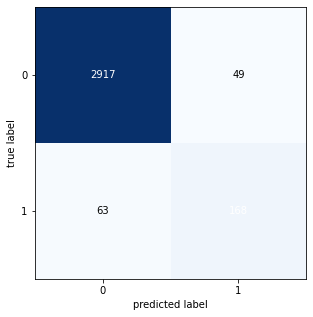

In [22]:
#From above, we can see that F1 score is highest at a threshold of 0.4
pred_val_labels1=(pred1>0.4).astype(int)

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred_val_labels1))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred_val_labels1))
CM = confusion_matrix(val_labels, pred_val_labels1)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

## Building the model using fastText (Common Crawl) pretrained embeddings

In [0]:
model2_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length, weights = [embeddings_matrix2], trainable = False),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model2_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history2=model2_lstm.fit(train_padded, 
                    train_labels, 
                    epochs=num_epochs, 
                    batch_size=128, 
                    validation_data=(val_padded,val_labels),
                    callbacks=[reduce],
                    verbose=1)

Epoch 1/10
225/225 [==============================] - 160s 711ms/step - loss: 0.1979 - accuracy: 0.9306 - val_loss: 0.1193 - val_accuracy: 0.9562 - lr: 0.0010
Epoch 2/10
225/225 [==============================] - 159s 708ms/step - loss: 0.1526 - accuracy: 0.9467 - val_loss: 0.1128 - val_accuracy: 0.9581 - lr: 0.0010
Epoch 3/10
225/225 [==============================] - 163s 723ms/step - loss: 0.1428 - accuracy: 0.9500 - val_loss: 0.1142 - val_accuracy: 0.9581 - lr: 0.0010
Epoch 4/10
225/225 [==============================] - 163s 726ms/step - loss: 0.1382 - accuracy: 0.9509 - val_loss: 0.1089 - val_accuracy: 0.9618 - lr: 0.0010
Epoch 5/10
225/225 [==============================] - 164s 728ms/step - loss: 0.1319 - accuracy: 0.9531 - val_loss: 0.1044 - val_accuracy: 0.9606 - lr: 0.0010
Epoch 6/10
225/225 [==============================] - 164s 730ms/step - loss: 0.1273 - accuracy: 0.9542 - val_loss: 0.0988 - val_accuracy: 0.9650 - lr: 0.0010
Epoch 7/10
225/225 [==========================

In [27]:
#Determining the optimal threshold value to seggregate the classes
pred2= model2_lstm.predict(val_padded, batch_size=128,verbose=1)
from sklearn import metrics
for thresh in np.arange(0.1, 0.501, 0.01):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(val_labels, (pred2>thresh).astype(int))))

25/25 [==============================] - 6s 223ms/step
F1 score at threshold 0.1 is 0.6510903426791278
F1 score at threshold 0.11 is 0.6613418530351437
F1 score at threshold 0.12 is 0.6655844155844156
F1 score at threshold 0.13 is 0.6835016835016835
F1 score at threshold 0.14 is 0.6905982905982907
F1 score at threshold 0.15 is 0.7026086956521739
F1 score at threshold 0.16 is 0.7175843694493784
F1 score at threshold 0.17 is 0.7217235188509874
F1 score at threshold 0.18 is 0.7285974499089253
F1 score at threshold 0.19 is 0.7329650092081031
F1 score at threshold 0.2 is 0.7327102803738318
F1 score at threshold 0.21 is 0.7376425855513308
F1 score at threshold 0.22 is 0.7408829174664109
F1 score at threshold 0.23 is 0.7431906614785992
F1 score at threshold 0.24 is 0.7387033398821218
F1 score at threshold 0.25 is 0.7391304347826089
F1 score at threshold 0.26 is 0.7355864811133203
F1 score at threshold 0.27 is 0.7370517928286852
F1 score at threshold 0.28 is 0.7389558232931727
F1 score at thre

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2966
           1       0.78      0.72      0.75       231

    accuracy                           0.96      3197
   macro avg       0.88      0.85      0.87      3197
weighted avg       0.96      0.96      0.96      3197

[[2918   48]
 [  64  167]]


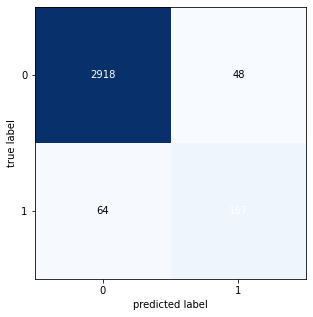

In [28]:
pred_val_labels2=(pred2>0.42).astype(int)

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred_val_labels2))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred_val_labels2))
CM = confusion_matrix(val_labels, pred_val_labels2)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

## Building the model using GloVe(Wiki) pretrained embeddings

In [0]:
model3_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights = [embeddings_matrix3], trainable = False),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [31]:
reduce =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, mode='auto')
#early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=10, mode='auto')
model3_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history3=model3_lstm.fit(train_padded, 
                    train_labels, 
                    epochs=num_epochs, 
                    batch_size=128, 
                    validation_data=(val_padded,val_labels),
                    callbacks=[reduce],
                    verbose=1)

Epoch 1/10
225/225 [==============================] - 163s 726ms/step - loss: 0.2025 - accuracy: 0.9326 - val_loss: 0.1430 - val_accuracy: 0.9421 - lr: 0.0010
Epoch 2/10
225/225 [==============================] - 161s 717ms/step - loss: 0.1642 - accuracy: 0.9426 - val_loss: 0.1184 - val_accuracy: 0.9546 - lr: 0.0010
Epoch 3/10
225/225 [==============================] - 162s 718ms/step - loss: 0.1501 - accuracy: 0.9466 - val_loss: 0.1113 - val_accuracy: 0.9587 - lr: 0.0010
Epoch 4/10
225/225 [==============================] - 162s 720ms/step - loss: 0.1412 - accuracy: 0.9505 - val_loss: 0.1049 - val_accuracy: 0.9628 - lr: 0.0010
Epoch 5/10
225/225 [==============================] - 162s 722ms/step - loss: 0.1328 - accuracy: 0.9524 - val_loss: 0.1078 - val_accuracy: 0.9631 - lr: 0.0010
Epoch 6/10
225/225 [==============================] - 162s 720ms/step - loss: 0.1283 - accuracy: 0.9544 - val_loss: 0.1044 - val_accuracy: 0.9593 - lr: 0.0010
Epoch 7/10
225/225 [==========================

In [32]:
#Determining the optimal threshold value to seggregate the classes
pred3= model3_lstm.predict(val_padded, batch_size=128,verbose=1)
from sklearn import metrics
for thresh in np.arange(0.1, 0.501, 0.01):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(val_labels, (pred3>thresh).astype(int))))

25/25 [==============================] - 6s 222ms/step
F1 score at threshold 0.1 is 0.5609436435124509
F1 score at threshold 0.11 is 0.572199730094467
F1 score at threshold 0.12 is 0.5824175824175823
F1 score at threshold 0.13 is 0.5921787709497207
F1 score at threshold 0.14 is 0.6019971469329529
F1 score at threshold 0.15 is 0.6069364161849711
F1 score at threshold 0.16 is 0.6147058823529412
F1 score at threshold 0.17 is 0.6238805970149254
F1 score at threshold 0.18 is 0.6291793313069909
F1 score at threshold 0.19 is 0.6377708978328174
F1 score at threshold 0.2 is 0.6467817896389325
F1 score at threshold 0.21 is 0.6549520766773163
F1 score at threshold 0.22 is 0.6645056726094003
F1 score at threshold 0.23 is 0.6677524429967426
F1 score at threshold 0.24 is 0.6721311475409836
F1 score at threshold 0.25 is 0.6688741721854305
F1 score at threshold 0.26 is 0.6778523489932885
F1 score at threshold 0.27 is 0.6836734693877551
F1 score at threshold 0.28 is 0.689655172413793
F1 score at thresh

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2966
           1       0.66      0.80      0.72       231

    accuracy                           0.96      3197
   macro avg       0.82      0.88      0.85      3197
weighted avg       0.96      0.96      0.96      3197

[[2872   94]
 [  47  184]]


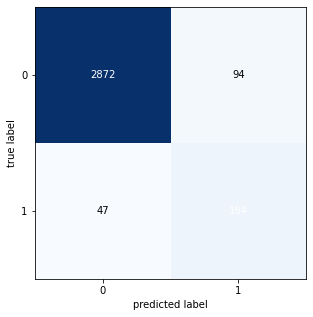

In [33]:
pred_val_labels3=(pred3>0.45).astype(int)

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred_val_labels3))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred_val_labels3))
CM = confusion_matrix(val_labels, pred_val_labels3)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

## Ensemble Model

In [34]:
pred1_l = model1_lstm.predict(val_padded, batch_size=256,verbose=1)
pred2_l = model2_lstm.predict(val_padded, batch_size=256,verbose=1)
pred3_1 = model3_lstm.predict(val_padded, batch_size=256,verbose=1)
pred_val = 0.5*pred1_l + 0.25*pred2_l + 0.25*pred3_1

for thresh in np.arange(0.1, 0.501, 0.01):
    thresh = np.round(thresh, 2)
    print("F1 score at threshold {0} is {1}".format(thresh, metrics.f1_score(val_labels, (pred_val>thresh).astype(int))))

13/13 [==============================] - 5s 372ms/step
F1 score at threshold 0.1 is 0.5994550408719345
F1 score at threshold 0.11 is 0.6123595505617977
F1 score at threshold 0.12 is 0.6271676300578034
F1 score at threshold 0.13 is 0.642962962962963
F1 score at threshold 0.14 is 0.6646153846153847
F1 score at threshold 0.15 is 0.670846394984326
F1 score at threshold 0.16 is 0.6869983948635634
F1 score at threshold 0.17 is 0.6918032786885246
F1 score at threshold 0.18 is 0.7046979865771812
F1 score at threshold 0.19 is 0.7167235494880546
F1 score at threshold 0.2 is 0.7219343696027634
F1 score at threshold 0.21 is 0.7205623901581721
F1 score at threshold 0.22 is 0.7282415630550622
F1 score at threshold 0.23 is 0.7341772151898734
F1 score at threshold 0.24 is 0.7282809611829943
F1 score at threshold 0.25 is 0.7313432835820894
F1 score at threshold 0.26 is 0.7400379506641367
F1 score at threshold 0.27 is 0.7403100775193798
F1 score at threshold 0.28 is 0.7465618860510805
F1 score at thresh

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2966
           1       0.74      0.79      0.76       231

    accuracy                           0.96      3197
   macro avg       0.86      0.88      0.87      3197
weighted avg       0.97      0.96      0.97      3197

[[2902   64]
 [  49  182]]


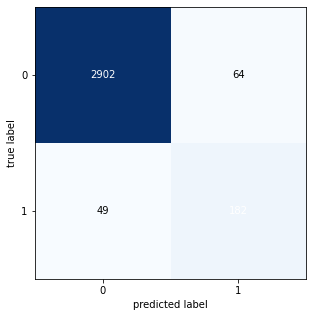

In [35]:
pred_val_labels=(pred_val>0.33).astype(int)

from sklearn.metrics import classification_report
print(classification_report(val_labels,pred_val_labels))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_labels, pred_val_labels))
CM = confusion_matrix(val_labels, pred_val_labels)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

## Ensemble Model gives the best F1 Score

In [37]:

pred_test1 = model1_lstm.predict(test_padded, batch_size=256,verbose=1)
pred_test2 = model2_lstm.predict(test_padded, batch_size=256,verbose=1)
pred_test3 = model3_lstm.predict(test_padded, batch_size=256,verbose=1)
pred_test = 0.5*pred_test1 + 0.25*pred_test2 + 0.25*pred_test3 
pred_test_labels = (pred_test>0.33).astype(int)
out_df = pd.DataFrame({'id':df_test['id'].values})
out_df['label'] = pred_test_labels
out_df.to_csv('/content/drive/My Drive/AVDLapp/submission.csv', index=False)

68/68 [==============================] - 28s 409ms/step
